In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dataframe:

### Preço diário do Bitcoin:

In [234]:
path = r'../data/btc.csv'
df = pd.read_csv(
    filepath_or_buffer=path,
    decimal='.',
    sep=',',
)

/tmp/ipykernel_36205/3360293879.py:2: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [235]:
display(df.head())

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d,principal_market_price_usd,principal_market_usd
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Código:

In [236]:
class Bitcoin():
    # Data Understanding: 
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)

    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def gráfico_de_distribuição(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna], kde=True)
        plt.show()

    def verificando_correlação(self, dataframe, coluna):
        dataframe = pd.DataFrame(
            {
            'Correlação': dataframe.corr()[coluna]
            },
            index=dataframe.columns
        )
        return dataframe
        
    # Data Preparation:
    def excluindo_colunas(self, dataframe, colunas):
        return dataframe.drop(columns=colunas)
    
    def removendo_nulos(self, dataframe):
        return dataframe.dropna()
    
    def normalizando_os_dados(self, dataframe):
        return scale(dataframe)

    def substituindo_valores(self, dataframe, colunas, valores):      
        return dataframe[colunas].replace(valores)
    
    def convertendo_para_inteiro(self, dataframe, colunas):
        return dataframe[colunas].astype(int)

    def agrupando_por_condição(self, dataframe, coluna_1, coluna_2):
        dataframe = dataframe.groupby(coluna_1)[coluna_2].mean().reset_index()
        dataframe[coluna_2] = dataframe[coluna_2]*100
        return dataframe

    # def normalizando_os_dados(self, dataframe):
    #     scaler = StandardScaler()
    #     dataframe = pd.DataFrame(
    #         scaler.fit_transform(dataframe), 
    #         index=dataframe.index, 
    #         columns=dataframe.columns
    #     )
    #     return dataframe
    
    # Data Visualization:
    def gráfico_de_barras_barplot(self, dataframe, x, y, title):
        plt.subplots(figsize = (10,4))
        sns.barplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title(title)
    
    def gráfico_de_linhas_lineplot(self, dataframe, x, y, hue, title):
        plt.subplots(figsize = (12,4))
        sns.lineplot(data=dataframe, x=x,  y= y, hue=hue)
        ax = plt.gca()
        ax.set_title(title)

    def gráfico_de_correlação_pairplot(self, dataframe):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_de_correlação_heatmap(self, dataframe):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12})
        plt.show()

    # Modelo:
    def treinamento(self, dataframe, x, y):
        x_train, x_test, y_train, y_test = train_test_split(
            dataframe[[x]],
            dataframe[y],
            train_size=0.7,
            test_size=0.3,
            random_state=46
        )

        ln = LinearRegression()
        treinamento = ln.fit(x_train, y_train)

        y_pred = ln.predict(x_test)

        r2 = r2_score(y_true=y_test, y_pred=y_pred)

        print(f'Coeficiente de Determinação (R²): {r2}')

        return treinamento, y_pred, y_test
    
    def metricas_do_modelo(self, y_true, y_pred):
        print('MAE:', metrics.mean_absolute_error(y_true, y_pred))
        print('MSE:', metrics.mean_squared_error(y_true, y_pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

if __name__ == '__main__':
    bitcoin = Bitcoin()

# Output:

## Data Understanding:

In [237]:
corr = bitcoin.verificando_correlação(dataframe=df, coluna='PriceUSD')

In [238]:
colunas = corr[corr['Correlação'] > 0.69]
colunas = colunas.index

In [239]:
# dataset = df[['time','PriceUSD', 'HashRate', 'FeeMeanUSD', 'CapMrktCurUSD', 'AdrActCnt', 'AdrBalCnt']]
dataset = df[['time', 'PriceUSD', 'CapAct1yrUSD', 'CapMrktCurUSD', 'CapMrktEstUSD', 'CapMrktFFUSD', 'CapRealUSD', 'DiffLast', 'DiffMean', 'FlowInExUSD', 'FlowOutExUSD', 'HashRate', 'HashRate30d', 'IssContUSD', 'IssTotUSD', 'PriceUSD', 'ReferenceRate', 'ReferenceRateEUR', 'ReferenceRateUSD', 'RevUSD', 'SplyAdrBalUSD10M', 'SplyAdrBalUSD1M', 'SplyMiner0HopAllUSD', 'SplyMiner1HopAllUSD', 'TxTfrValAdjUSD', 'TxTfrValMedUSD']]

In [240]:
display(dataset.tail())

,time,PriceUSD,CapAct1yrUSD,CapMrktCurUSD,CapMrktEstUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,FlowInExUSD,...,ReferenceRate,ReferenceRateEUR,ReferenceRateUSD,RevUSD,SplyAdrBalUSD10M,SplyAdrBalUSD1M,SplyMiner0HopAllUSD,SplyMiner1HopAllUSD,TxTfrValAdjUSD,TxTfrValMedUSD
5262,2023-06-01,26825.371345,1.654456e+11,5.201471e+11,5.201294e+11,3.692959e+11,3.918074e+11,5.123434e+13,5.123434e+13,5.070559e+08,...,27217.683258,25465.927306,27217.683258,2.397037e+07,9.696224e+06,1.445058e+07,4.845868e+10,6.897248e+10,4.788954e+09,63.300365
5263,2023-06-02,27255.227994,1.680304e+11,5.285100e+11,5.284867e+11,3.752355e+11,3.919245e+11,5.123434e+13,5.123434e+13,5.434576e+08,...,26825.371345,24968.247102,26825.371345,2.998518e+07,9.715845e+06,1.446645e+07,4.924087e+10,7.009265e+10,3.530338e+09,45.243678
5264,2023-06-03,27079.408464,1.668006e+11,5.251227e+11,5.251053e+11,3.728340e+11,3.919278e+11,5.123434e+13,5.123434e+13,4.933940e+08,...,27255.227994,25477.365156,27255.227994,2.320207e+07,9.709971e+06,1.446168e+07,4.892391e+10,6.966056e+10,2.695040e+09,35.495418
5265,2023-06-04,27158.254570,1.668575e+11,5.266768e+11,5.266566e+11,3.739049e+11,3.919553e+11,5.123434e+13,5.123434e+13,4.399179e+08,...,27079.408464,25306.317037,27079.408464,2.613182e+07,9.717006e+06,1.446871e+07,4.906937e+10,7.004061e+10,2.387431e+09,28.470134
5266,2023-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27158.254570,25402.689164,27158.254570,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
print(list(dataset.columns))

['time', 'PriceUSD', 'CapAct1yrUSD', 'CapMrktCurUSD', 'CapMrktEstUSD', 'CapMrktFFUSD', 'CapRealUSD', 'DiffLast', 'DiffMean', 'FlowInExUSD', 'FlowOutExUSD', 'HashRate', 'HashRate30d', 'IssContUSD', 'IssTotUSD', 'PriceUSD', 'ReferenceRate', 'ReferenceRateEUR', 'ReferenceRateUSD', 'RevUSD', 'SplyAdrBalUSD10M', 'SplyAdrBalUSD1M', 'SplyMiner0HopAllUSD', 'SplyMiner1HopAllUSD', 'TxTfrValAdjUSD', 'TxTfrValMedUSD']


In [242]:
bitcoin.verificando_as_dimensões_do_dataframe(dataframe=dataset)

Linhas: 5267 
Colunas: 26


In [243]:
bitcoin.descrição(dataframe=dataset)

,PriceUSD,CapAct1yrUSD,CapMrktCurUSD,CapMrktEstUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,FlowInExUSD,FlowOutExUSD,...,ReferenceRate,ReferenceRateEUR,ReferenceRateUSD,RevUSD,SplyAdrBalUSD10M,SplyAdrBalUSD1M,SplyMiner0HopAllUSD,SplyMiner1HopAllUSD,TxTfrValAdjUSD,TxTfrValMedUSD
count,4705.00,4.705000e+03,4.705000e+03,1.444000e+03,4.705000e+03,5.266000e+03,5.260000e+03,5.260000e+03,4.705000e+03,4.705000e+03,...,4705.00,4299.00,4705.00,4705.00,4705.00,4705.00,4.705000e+03,4.705000e+03,4.705000e+03,4705.00
mean,9144.44,7.118653e+10,1.696009e+11,4.868842e+11,1.311858e+11,8.895100e+10,7.008552e+12,7.002985e+12,2.421569e+08,2.568655e+08,...,9144.44,8822.47,9144.44,10892352.59,4329684.79,7131492.97,1.648448e+10,2.482801e+10,2.675207e+09,52.88
std,14575.66,1.174219e+11,2.753950e+11,3.094474e+11,2.116802e+11,1.443882e+11,1.138815e+13,1.137841e+13,4.234560e+08,4.603261e+08,...,14575.66,13052.57,14575.66,14472535.19,3792855.79,5163729.80,2.616186e+10,3.912775e+10,4.963077e+09,59.39
min,0.05,5.394211e+04,1.776705e+05,9.058570e+10,1.776705e+05,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.05,1.57,0.05,307.00,0.00,0.00,1.210088e+05,1.599111e+05,4.647100e+02,0.00
25%,141.01,9.039313e+08,1.573425e+09,1.887311e+11,1.573053e+09,5.397442e+07,2.190866e+06,2.190866e+06,3.261697e+06,3.113372e+06,...,141.01,257.88,141.01,672171.35,283832.44,2533992.31,2.846222e+08,4.523587e+08,3.713538e+07,5.02
50%,903.20,6.265156e+09,1.349812e+10,4.088052e+11,1.193459e+10,4.732704e+09,1.654968e+11,1.654968e+11,4.688353e+07,4.646432e+07,...,903.20,2361.83,903.20,2692731.94,2695352.16,5858523.77,1.730245e+09,2.862333e+09,3.580389e+08,26.54
75%,10261.49,8.131076e+10,1.835621e+11,7.333775e+11,1.451606e+11,1.014031e+11,1.287684e+13,1.287684e+13,2.907286e+08,3.078132e+08,...,10261.49,9589.80,10261.49,16615237.28,7184433.29,11002739.58,1.844725e+10,2.907399e+10,2.605947e+09,87.47
max,67541.76,5.808754e+11,1.274350e+12,1.274303e+12,9.816991e+11,4.685376e+11,5.123434e+13,5.123434e+13,5.757413e+09,6.004072e+09,...,67541.76,58279.20,67541.76,77835660.59,11322973.84,15784166.57,1.215017e+11,1.766130e+11,3.646588e+10,534.85


In [244]:
bitcoin.verificando_valores_nulos(dataframe=dataset)

,Quantidade,Porcentagem
time,0,0.00%
PriceUSD,562,10.67%
CapAct1yrUSD,562,10.67%
CapMrktCurUSD,562,10.67%
CapMrktEstUSD,3823,72.58%
CapMrktFFUSD,562,10.67%
CapRealUSD,1,0.02%
DiffLast,7,0.13%
DiffMean,7,0.13%
FlowInExUSD,562,10.67%


In [245]:
bitcoin.verificando_valores_duplicados(dataframe=dataset)

,Quantidade,Porcentagem
time,0,0.00%
PriceUSD,584,11.09%
CapAct1yrUSD,561,10.65%
CapMrktCurUSD,561,10.65%
CapMrktEstUSD,3822,72.57%
CapMrktFFUSD,561,10.65%
CapRealUSD,560,10.63%
DiffLast,4887,92.79%
DiffMean,4210,79.93%
FlowInExUSD,853,16.20%


In [246]:
bitcoin.verificando_tipos(dataframe=dataset)

,Tipos
time,object
PriceUSD,float64
CapAct1yrUSD,float64
CapMrktCurUSD,float64
CapMrktEstUSD,float64
CapMrktFFUSD,float64
CapRealUSD,float64
DiffLast,float64
DiffMean,float64
FlowInExUSD,float64


## Data Preparation:

In [247]:
dataset = bitcoin.removendo_nulos(dataframe=dataset)

In [248]:
colunas = ['PriceUSD', 'CapAct1yrUSD', 'CapMrktCurUSD', 'CapMrktEstUSD', 'CapMrktFFUSD', 'CapRealUSD', 'DiffLast', 'DiffMean', 'FlowInExUSD', 'FlowOutExUSD', 'HashRate', 'HashRate30d', 'IssContUSD', 'IssTotUSD', 'PriceUSD', 'ReferenceRate', 'ReferenceRateEUR', 'ReferenceRateUSD', 'RevUSD', 'SplyAdrBalUSD10M', 'SplyAdrBalUSD1M', 'SplyMiner0HopAllUSD', 'SplyMiner1HopAllUSD', 'TxTfrValAdjUSD', 'TxTfrValMedUSD']

In [249]:
dataset[colunas] = bitcoin.normalizando_os_dados(dataframe=dataset[colunas])

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


## Data Visualization:

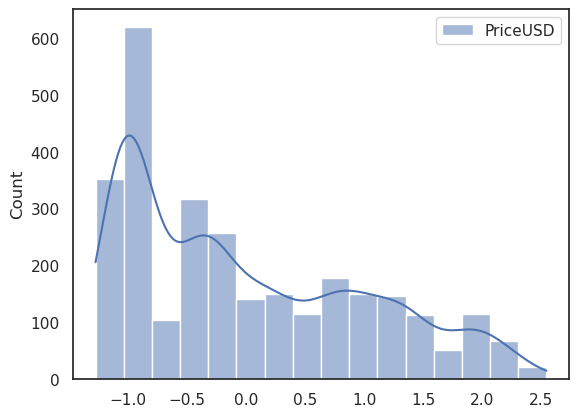

In [250]:
bitcoin.gráfico_de_distribuição(dataframe=dataset, coluna='PriceUSD')

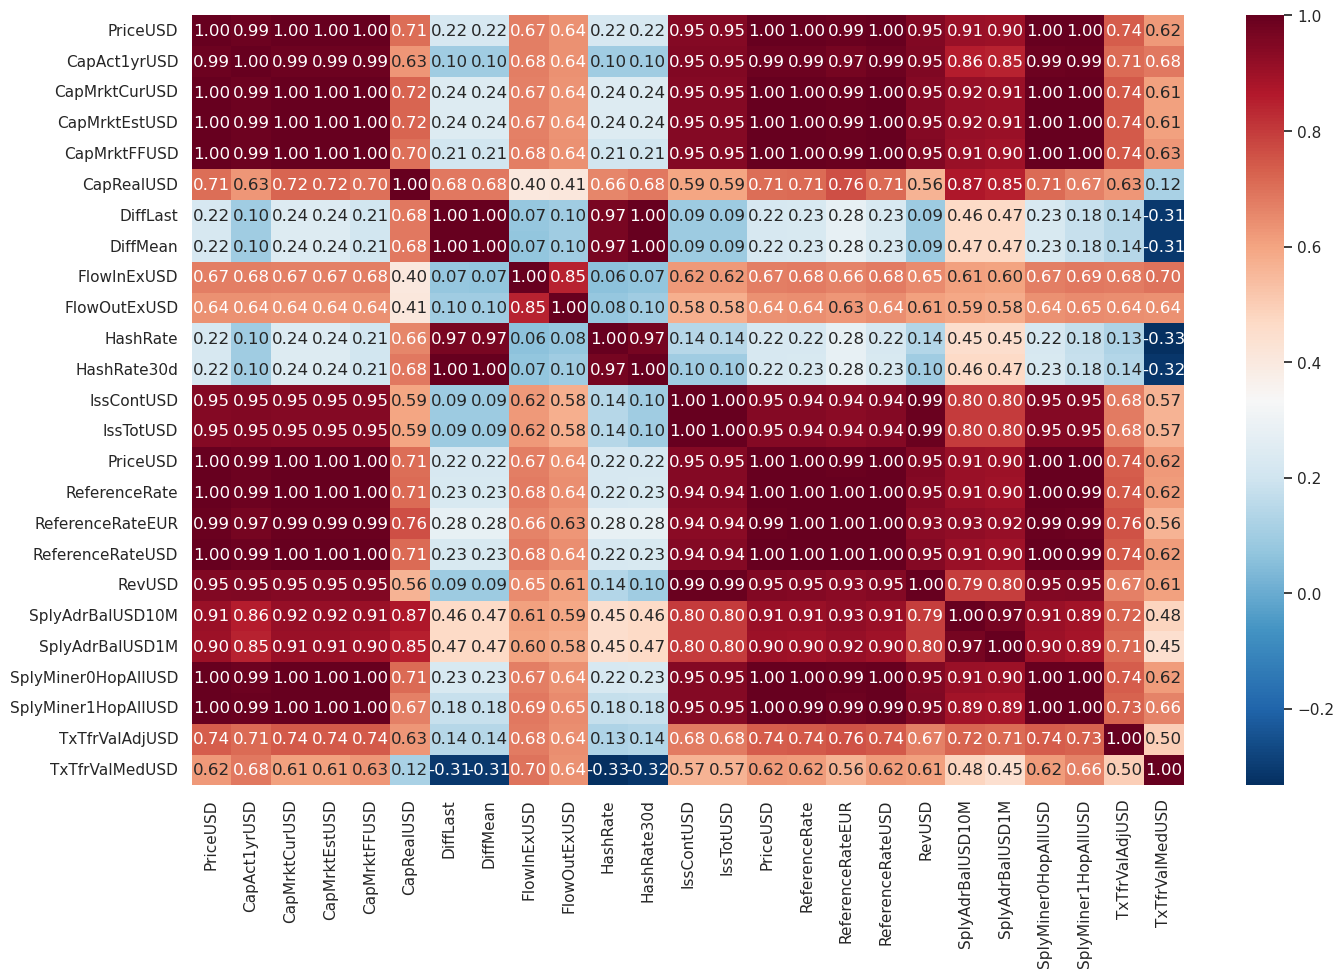

In [251]:
bitcoin.gráfico_de_correlação_heatmap(dataframe=dataset)

In [252]:
# bitcoin.gráfico_de_correlação_pairplot(dataframe=dataset)

## Modelo: